노이즈가 포함된 데이터에서 원본 데이터를 복원하는 오토인코더 모델을 학습시켜, 노이즈에 강건한 성능을 가지도록 설계해보기

Denoising AutoEncoder 라고 부름

1. 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('DSA_features.csv')
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [3]:
df.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9120 entries, 0 to 9119
Columns: 272 entries, T_xacc_mean to people
dtypes: float64(270), object(2)
memory usage: 18.9+ MB


In [5]:
# 결측치 확인

df.isnull().values.any()

False

2. 필요한 데이터만 추출하기

Normal - lyingBack,lyingRigh

Abnormal - sitting 으로

In [6]:
print(df['activity'].unique())

['sitting' 'standing' 'lyingBack' 'lyingRigh' 'ascendingStairs'
 'decendingStairs' 'standingInElevatorStill' 'movingInElevator'
 'walkingLot' 'walkingTreadmillFlat' 'walkingTreadmillIncline'
 'runningTreadmill' 'stepper' 'crossTrainer' 'cyclingHorizontal'
 'cyclingVertical' 'rowing' 'jumping' 'basketBall']


In [7]:
# activity 열에서 'lyingBack', 'lyingRigh', 'sitting' 만 추출하기
df = df[df['activity'].isin(['lyingBack', 'lyingRigh', 'sitting'])]
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,2.620502,2.6592,2.5891,0.000199,0.014113,0.148452,-9.392025,-9.3424,-9.42070,0.000242,...,0.009589,0.401254,-0.410987,-0.382210,-0.446050,9.935077e-05,0.009967,-0.597598,lyingRigh,p8
1916,2.613423,2.6572,2.5815,0.000207,0.014387,0.368746,-9.398851,-9.3657,-9.43560,0.000156,...,0.008588,0.147180,-0.411248,-0.365810,-0.436760,8.659481e-05,0.009306,1.021454,lyingRigh,p8
1917,2.614750,2.6576,2.5654,0.000257,0.016018,-0.007991,-9.397350,-9.3628,-9.43130,0.000214,...,0.005814,0.032341,-0.409787,-0.379260,-0.434310,7.258946e-05,0.008520,0.431012,lyingRigh,p8
1918,2.620167,2.6589,2.5781,0.000216,0.014691,-0.114904,-9.397014,-9.3649,-9.45390,0.000257,...,0.009510,0.409508,-0.409101,-0.360740,-0.440870,1.127801e-04,0.010620,1.368666,lyingRigh,p8


In [8]:
# 제대로 원하는 값들이 추출되었는지 확인하는 과정
df['activity'].unique(), df.shape, df['activity'].value_counts()


(array(['sitting', 'lyingBack', 'lyingRigh'], dtype=object),
 (1440, 272),
 activity
 sitting      480
 lyingBack    480
 lyingRigh    480
 Name: count, dtype: int64)

3. activity 열 전처리 하기

activity 값이 수치형 데이터가 아니므로 sitting 등 문자열이 아닌 정상 데이터를 0으로 비정상 데이터를 1로 바꿔준다.

In [9]:
# 'activity' 열 전처리: lyingBack, lyingRigh -> 정상 (0), sitting -> 비정상 (1)
df['activity'] = df['activity'].replace({'lyingBack': 0, 'lyingRigh': 0, 'sitting': 1})
df

<ipython-input-9-37417d3b719c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['activity'] = df['activity'].replace({'lyingBack': 0, 'lyingRigh': 0, 'sitting': 1})
<ipython-input-9-37417d3b719c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['activity'] = df['activity'].replace({'lyingBack': 0, 'lyingRigh': 0, 'sitting': 1})


,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,1,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,1,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,1,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,1,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,1,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,2.620502,2.6592,2.5891,0.000199,0.014113,0.148452,-9.392025,-9.3424,-9.42070,0.000242,...,0.009589,0.401254,-0.410987,-0.382210,-0.446050,9.935077e-05,0.009967,-0.597598,0,p8
1916,2.613423,2.6572,2.5815,0.000207,0.014387,0.368746,-9.398851,-9.3657,-9.43560,0.000156,...,0.008588,0.147180,-0.411248,-0.365810,-0.436760,8.659481e-05,0.009306,1.021454,0,p8
1917,2.614750,2.6576,2.5654,0.000257,0.016018,-0.007991,-9.397350,-9.3628,-9.43130,0.000214,...,0.005814,0.032341,-0.409787,-0.379260,-0.434310,7.258946e-05,0.008520,0.431012,0,p8
1918,2.620167,2.6589,2.5781,0.000216,0.014691,-0.114904,-9.397014,-9.3649,-9.45390,0.000257,...,0.009510,0.409508,-0.409101,-0.360740,-0.440870,1.127801e-04,0.010620,1.368666,0,p8


<ipython-input-10-4ab9ab9d2a1b>:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['activity'], sort = True)


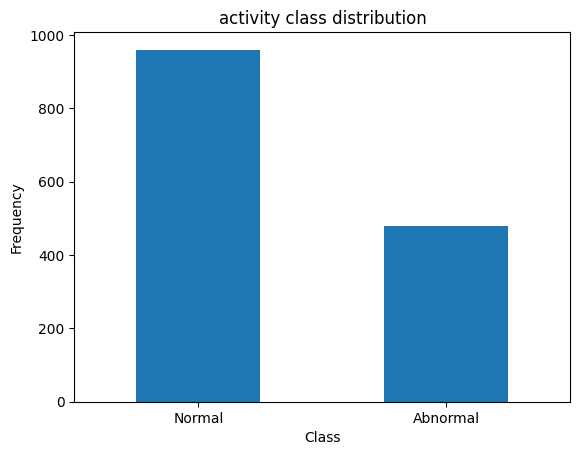

In [10]:
# 비율 확인
LABELS = ["Normal","Abnormal"]
count_classes = pd.value_counts(df['activity'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("activity class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

4. 데이터 세트 train,test,valid 분리 및 데이터 정규화하기, 데이터 세트에 노이즈 추가하기

In [11]:
# 노이즈 추가 함수 (Gaussian 노이즈) noise_factor는 노이즈 강도
def add_noise(x, noise_factor=0.2):
    noisy_data = x + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x.shape)
    return noisy_data


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test = train_test_split(df, test_size=0.2,shuffle=True, random_state=42)
x_train, x_valid = train_test_split(x_train, test_size=0.2,shuffle=True, random_state=42)

# 정상 데이터(0)만 사용하여 학습에 활용 (lyingBack, lyingRight)
# values를 통해 넘파이 배열로 바꿔주기
x_train = x_train[x_train.activity == 0]
x_train = x_train.drop(['activity', 'people'], axis=1).values

x_valid = x_valid[x_valid.activity == 0]
x_valid = x_valid.drop(['activity', 'people'], axis=1).values

# 테스트 레이블을 남겨두는 이유는 나중에 정확도를 비교하기 위해서임
y_test = x_test['activity']  # 테스트 데이터에서 활동 라벨만 남기기
x_test = x_test.drop(['activity', 'people'], axis=1).values

x_train.shape, x_valid.shape, x_test.shape, y_test.shape


((607, 270), (156, 270), (288, 270), (288,))

In [13]:
# train, test 데이터 세트에 노이즈를 추가해준 train_noisy,test_noisy 데이터 만들기
x_train_noisy = add_noise(x_train, noise_factor=0.2)
#x_valid_noisy = add_noise(x_valid, noise_factor=0.2)
x_test_noisy = add_noise(x_test, noise_factor=0.2)

x_train_origin = x_train
x_test_origin = x_test

In [14]:
# StandardScaler로 데이터 정규화
scaler = StandardScaler()

x_train_origin = scaler.fit_transform(x_train_origin)
x_valid = scaler.transform(x_valid)
x_test_origin = scaler.transform(x_test_origin)

# 노이즈 데이터도 동일한 스케일로 변환
x_train_noisy = scaler.transform(x_train_noisy)
x_test_noisy = scaler.transform(x_test_noisy)

x_train_origin.shape, x_valid.shape, x_test_origin.shape, x_train_noisy.shape, x_test_noisy.shape

((607, 270), (156, 270), (288, 270), (607, 270), (288, 270))

5. 인코더 디코더 구조가 대칭인 오토인코더 모델 만들기

In [15]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [16]:
# 비선형 오토인코더 모델
input_dim = x_train.shape[1]
#입력 차원의 1/10인 27을 넣을 수도 있다.
encoding_dim = 27  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)


def non_linear_symmetric_autoencoder(input_dim, encoding_dim):

    input_layer = Input(shape=(input_dim,))
    encoded = Dense(encoding_dim, activation='relu')(input_layer)
    encoded = Dense(int(encoding_dim/2), activation='relu')(encoded)

    decoded = Dense(int(encoding_dim/2), activation='relu')(encoded)
    decoded = Dense(input_dim, activation='sigmoid')(decoded)

    # Autoencoder 모델
    autoencoder = Model(inputs=input_layer, outputs=decoded)
    return autoencoder

# 모델 빌드
autoencoder = non_linear_symmetric_autoencoder(input_dim, encoding_dim)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 270)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 27)                  │           7,317 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 13)                  │             364 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 13)                  │             182 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 270)                 │           3,780 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,643 (45.48 KB)

 Trainable params: 11,643 (45.48 KB)

 Non-trainable params: 0 (0.00 B)

학습하기(노이즈가 있는 데이터를 input으로 두고, 노이즈가 없는 원본 데이터를 찾아내는 것을 목표로 학습)

In [17]:
history = autoencoder.fit(x_train_noisy,x_train_origin,epochs=50,batch_size=32,validation_data=(x_valid,x_valid),shuffle=True)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 1.3624 - val_loss: 0.9402
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.3670 - val_loss: 0.9329
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.1955 - val_loss: 0.9259
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2995 - val_loss: 0.9183
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0843 - val_loss: 0.9103
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.2187 - val_loss: 0.9027
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.2335 - val_loss: 0.8969
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.0884 - val_loss: 0.8925
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.8995 - val_loss: 0.8880
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.2146 - val_loss: 0.8841
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.9888 - val_loss: 0.8816
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.9437 

손실값 그래프로 출력

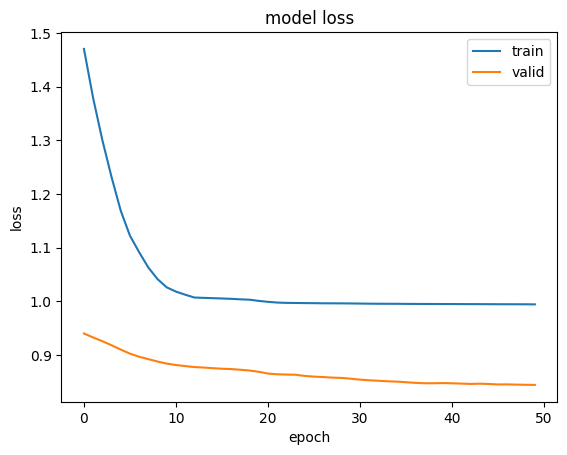

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right');

6. 학습한 결과 바탕으로 최종 분석

In [19]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨
# 오토인코더를 사용한 이상 탐지에서, 재구성 오류(Reconstruction Error)는 입력 데이터가
# 얼마나 잘 복원되었는지 측정하는 값
# 이를 통해 정상 데이터와 비정상 데이터를 구분할 수 있다.
# 재구성 오류 값은 test-predic 의 제곱의 평균인 MSE 로 나타내어 표기한다.

predictions = autoencoder.predict(x_test_noisy)
mse = np.mean(np.power(x_test_origin - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df = error_df.reset_index(drop = True)

error_df.describe()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,reconstruction_error,true_class
count,288.000000,288.000000
mean,3.876719,0.315972
std,42.889573,0.465711
min,0.224443,0.000000
25%,0.434122,0.000000
50%,0.611667,0.000000
75%,0.900586,1.000000
max,719.935640,1.000000


In [20]:
error_df.head()

,reconstruction_error,true_class
0,1.008050,1
1,0.613919,0
2,0.789696,0
3,1.316553,1
4,0.587672,0


정상 데이터의  Reconstruction Error 를 분석해보면

최솟값은 0.2 최댓값은 10.3 이고

데이터의 분포는 3분위수값을 보면 0.63 값 아래로 데이터의 75%가 분포 해 있음을 알 수 있다.

In [21]:
error_df_normal = error_df[error_df['true_class'] == 0].reset_index(drop=True)

error_df_normal.describe()

,reconstruction_error,true_class
count,197.000000,197.0
mean,0.656959,0.0
std,0.953776,0.0
min,0.224443,0.0
25%,0.394641,0.0
50%,0.482004,0.0
75%,0.635282,0.0
max,10.374139,0.0


비정상 데이터의 Reconstruction Error를 분석해보면

최솟값은 0.52, 최댓값은 719로 분포해 있고

3분위수 값을 통하여 데이터의 75%가 1.27 값 아래 있음을 알 수 있다.

따라서 최적의 threshold를 정할 때 정상 데이터 분석과 비교해서 0.4~0.8 사이가 적당한 것 같다.

In [22]:
error_df_abnormal = error_df[error_df['true_class'] == 1].reset_index(drop=True)

error_df_abnormal.describe()

,reconstruction_error,true_class
count,91.000000,91.0
mean,10.846970,1.0
std,76.106591,0.0
min,0.527979,1.0
25%,0.845040,1.0
50%,0.996819,1.0
75%,1.271545,1.0
max,719.935640,1.0


describe() 함수에서 어든 평균, 표준편차, 사분위수 값을 이용해 데이터의 분포를 확인해본다.

정규분포 그리기

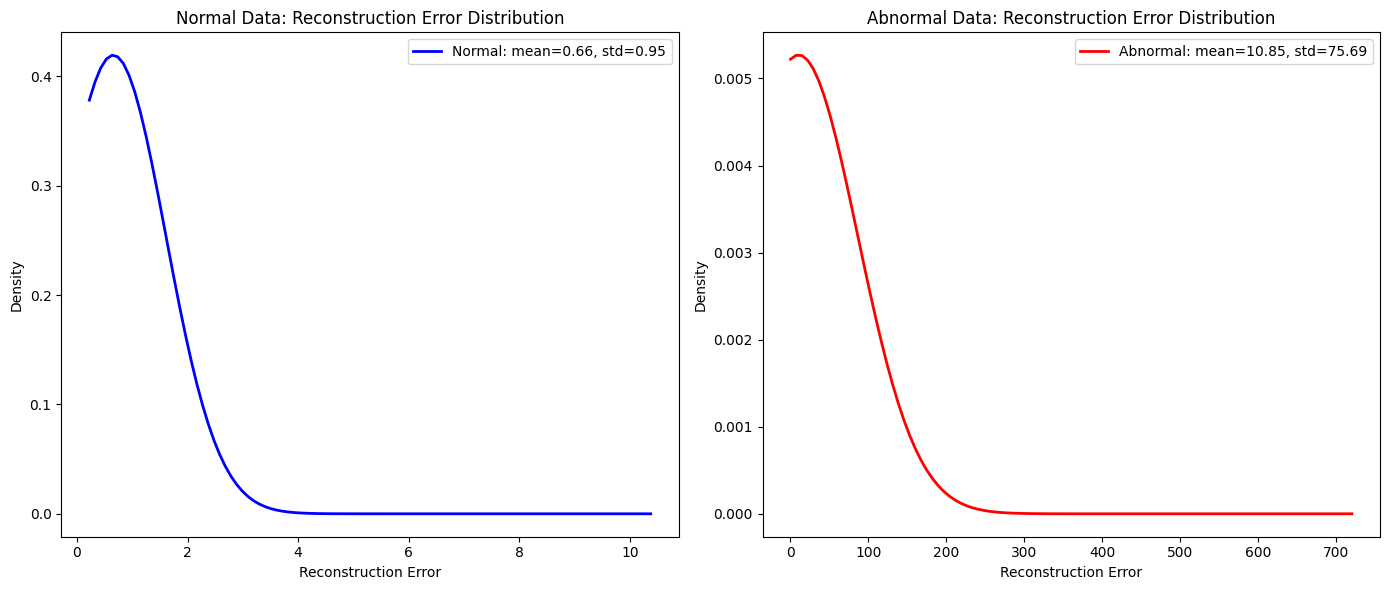

In [26]:
from scipy.stats import norm

# 재구성 오류 데이터 추출
normal_errors = error_df_normal['reconstruction_error']
abnormal_errors = error_df_abnormal['reconstruction_error']

# 평균과 표준편차 계산 (정규분포)
mu_normal, std_normal = norm.fit(normal_errors)
mu_abnormal, std_abnormal = norm.fit(abnormal_errors)

# Subplot을 이용해 두 개의 그래프를 나란히 그리기
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 첫 번째 subplot: Normal 데이터의 정규분포
x_normal = np.linspace(min(normal_errors), max(normal_errors), 100)
p_normal = norm.pdf(x_normal, mu_normal, std_normal)
axes[0].plot(x_normal, p_normal, 'b', linewidth=2, label=f'Normal: mean={mu_normal:.2f}, std={std_normal:.2f}')
axes[0].set_title('Normal Data: Reconstruction Error Distribution')
axes[0].set_xlabel('Reconstruction Error')
axes[0].set_ylabel('Density')
axes[0].legend(loc='upper right')

# 두 번째 subplot: Abnormal 데이터의 정규분포
x_abnormal = np.linspace(min(abnormal_errors), max(abnormal_errors), 100)
p_abnormal = norm.pdf(x_abnormal, mu_abnormal, std_abnormal)
axes[1].plot(x_abnormal, p_abnormal, 'r', linewidth=2, label=f'Abnormal: mean={mu_abnormal:.2f}, std={std_abnormal:.2f}')
axes[1].set_title('Abnormal Data: Reconstruction Error Distribution')
axes[1].set_xlabel('Reconstruction Error')
axes[1].set_ylabel('Density')
axes[1].legend(loc='upper right')

# 그래프 간격 조정
plt.tight_layout()
plt.show()


사분위수 그리기

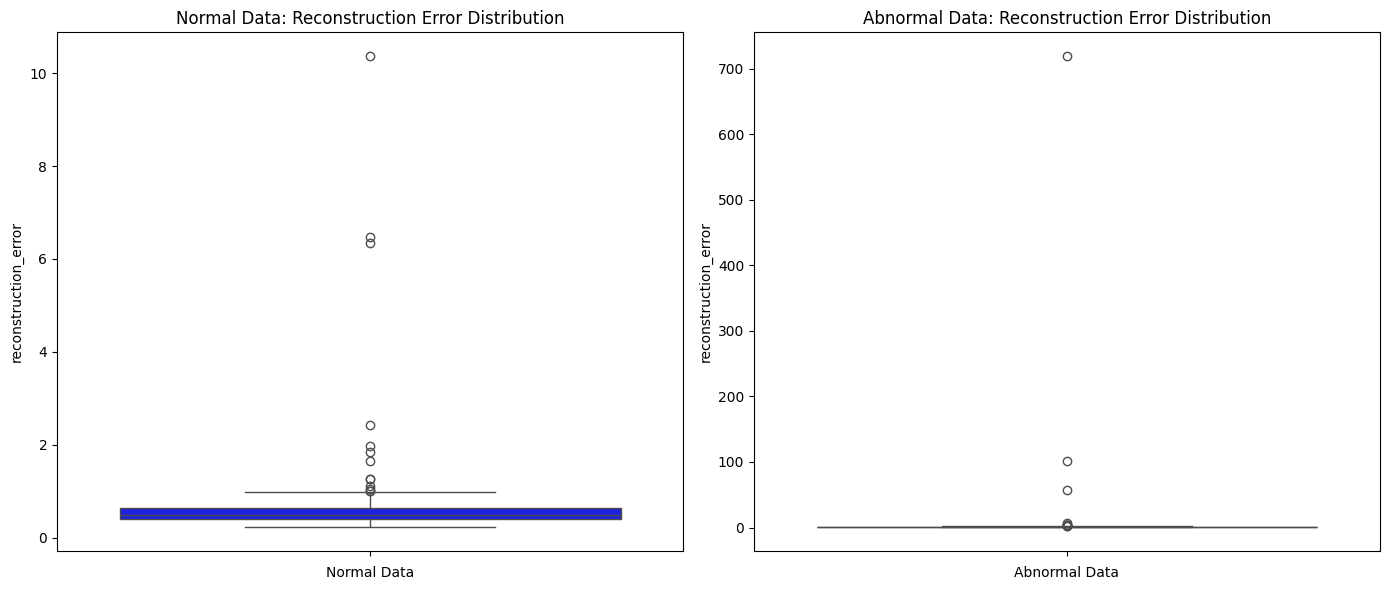

Normal Data 분위수:
Q1 (25%): 0.394640747987669, Q2 (50%): 0.4820040334530363, Q3 (75%): 0.6352821016193813, Q4 (Max): 10.374138617338852

Abnormal Data 분위수:
Q1 (25%): 0.8450403822108065, Q2 (50%): 0.9968194098745012, Q3 (75%): 1.2715446021893346, Q4 (Max): 719.9356400089144


In [27]:

# 재구성 오류 데이터 추출
normal_errors = error_df_normal['reconstruction_error']
abnormal_errors = error_df_abnormal['reconstruction_error']

# Subplot을 이용해 두 개의 박스플롯을 나란히 그리기
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 첫 번째 subplot: Normal 데이터의 박스플롯
sns.boxplot(data=normal_errors, ax=axes[0], color='blue')
axes[0].set_title('Normal Data: Reconstruction Error Distribution')
axes[0].set_xlabel('Normal Data')

# 두 번째 subplot: Abnormal 데이터의 박스플롯
sns.boxplot(data=abnormal_errors, ax=axes[1], color='red')
axes[1].set_title('Abnormal Data: Reconstruction Error Distribution')
axes[1].set_xlabel('Abnormal Data')

# 그래프 간격 조정
plt.tight_layout()
plt.show()

# 각 데이터의 1분위수(Q1), 2분위수(Q2), 3분위수(Q3), 최대값(Q4)를 출력
q1_normal = np.percentile(normal_errors, 25)
q2_normal = np.percentile(normal_errors, 50)
q3_normal = np.percentile(normal_errors, 75)
q4_normal = np.percentile(normal_errors, 100)

q1_abnormal = np.percentile(abnormal_errors, 25)
q2_abnormal = np.percentile(abnormal_errors, 50)
q3_abnormal = np.percentile(abnormal_errors, 75)
q4_abnormal = np.percentile(abnormal_errors, 100)

# 분위수 출력
print("Normal Data 분위수:")
print(f"Q1 (25%): {q1_normal}, Q2 (50%): {q2_normal}, Q3 (75%): {q3_normal}, Q4 (Max): {q4_normal}")

print("\nAbnormal Data 분위수:")
print(f"Q1 (25%): {q1_abnormal}, Q2 (50%): {q2_abnormal}, Q3 (75%): {q3_abnormal}, Q4 (Max): {q4_abnormal}")


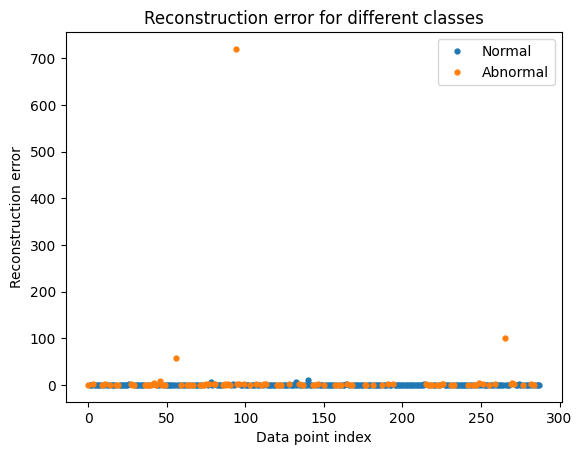

In [28]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Abnormal" if name == 1 else "Normal")
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [35]:
# threshold 값을 조정하여 최선의 정확도를 얻음,

threshold =0.7

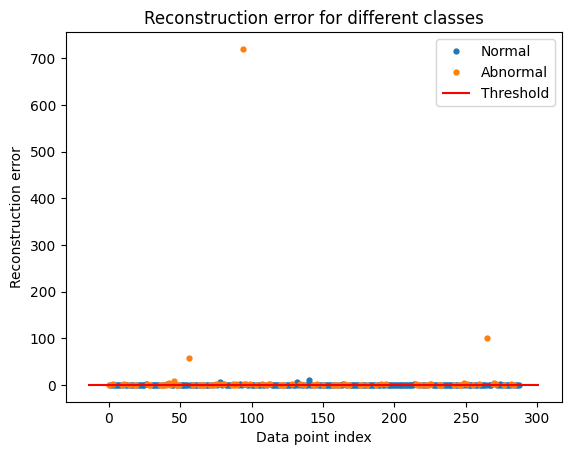

In [33]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Abnormal" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

confusion_matrix, classification_report 를 통해 여러 수치 확인하기.

Precision (정밀도): 정밀도는 모델이 Positive 클래스로 예측한 샘플 중에서 실제로 Positive인 샘플의 비율

Recall (재현율): 재현율은 실제 Positive 샘플 중에서 모델이 Positive으로 올바르게 예측한 비율

F1-Score: F1-Score는 정밀도와 재현율의 조화 평균. 즉, 정밀도와 재현율의 균형을 고려한 지표로, 두 값이 비슷할 때 높은 값을 가진다.

Accuracy (정확도): 정확도는 전체 샘플 중에서 모델이 올바르게 예측한 샘플의 비율

Macro Avg (매크로 평균): 클래스 간의 비율에 관계없이 단순 평균을 낸 값

Weighted Avg (가중 평균): 클래스 비율에 따라 가중치를 부여한 평균

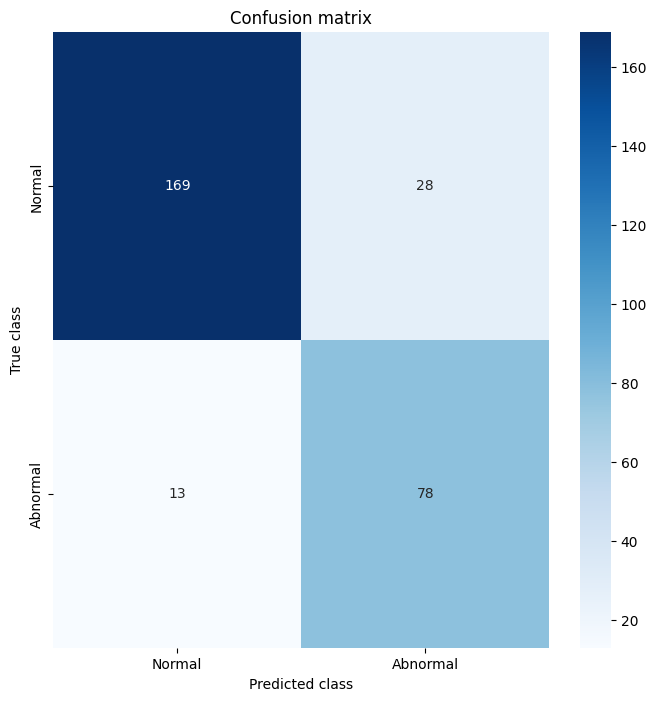

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       197
           1       0.74      0.86      0.79        91

    accuracy                           0.86       288
   macro avg       0.83      0.86      0.84       288
weighted avg       0.87      0.86      0.86       288



In [36]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",cmap="Blues");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))

7. 비대칭 오토인코더 모델

비선형 형태의 인코더 디코더의 구조가 비대칭인
오토인코더 모델로 위에서 수행한 비선형 대칭 오토인코더와 비교를 해본다.

차원 축소는 빠르게 하고(인코더), 복원 과정은 더 많은 층 또는 차원을 통해 더 많은 단계를 거치게 한다(디코더)

In [37]:
# 비선형 오토인코더 모델
input_dim = x_train.shape[1]
#입력 차원의 1/10인 27을 넣을 수도 있다.
encoding_dim = 27  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)


def non_linear_asymmetric_autoencoder(input_dim, encoding_dim):

    input_layer = Input(shape=(input_dim,))
    # 첫 번째 인코더 층
    encoded = Dense(int(encoding_dim*2), activation='relu')(input_layer)
    # 두 번째 인코더 층(최종 압축)
    encoded = Dense(int(encoding_dim/2), activation='relu')(encoded)

    # 첫 번째 디코더 층
    decoded = Dense(int(encoding_dim), activation='relu')(encoded)
    # 두 번째 디코더 층
    decoded = Dense(int(encoding_dim*2), activation='relu')(decoded)
    # 세번째 디코더 층(최종 복원 층)
    decoded = Dense(input_dim, activation='sigmoid')(decoded)

    # Autoencoder 모델
    autoencoder = Model(inputs=input_layer, outputs=decoded)
    return autoencoder

# 모델 빌드
asy_autoencoder = non_linear_asymmetric_autoencoder(input_dim, encoding_dim)

asy_autoencoder.compile(optimizer='adam', loss='mse')
asy_autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 270)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 54)                  │          14,634 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 13)                  │             715 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 27)                  │             378 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 54)                  │           1,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 270)                 │          14,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,089 (125.35 KB)

 Trainable params: 32,089 (125.35 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
history2 = asy_autoencoder.fit(x_train_noisy,x_train_origin,epochs=50,batch_size=32,validation_data=(x_valid,x_valid),shuffle=True)


Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 1.3461 - val_loss: 0.9321
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3880 - val_loss: 0.9169
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0764 - val_loss: 0.9051
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9755 - val_loss: 0.8993
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0559 - val_loss: 0.8951
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9133 - val_loss: 0.8907
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0961 - val_loss: 0.8878
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0472 - val_loss: 0.8860
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.9932 - val_loss: 0.8850
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9088 - val_loss: 0.8835
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8720 - val_loss: 0.8825
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4579 - val_

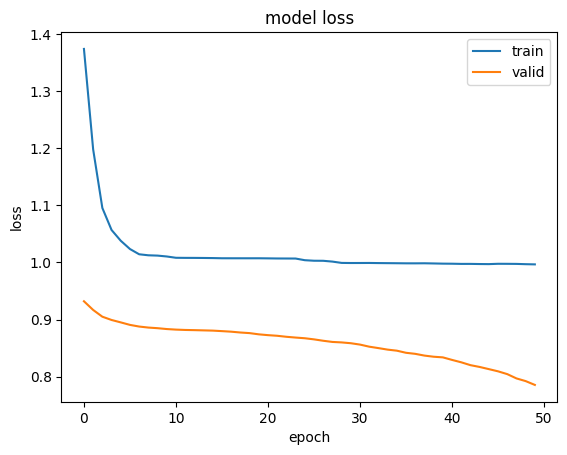

In [39]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right');

In [40]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨
# 오토인코더를 사용한 이상 탐지에서, 재구성 오류(Reconstruction Error)는 입력 데이터가
# 얼마나 잘 복원되었는지 측정하는 값
# 이를 통해 정상 데이터와 비정상 데이터를 구분할 수 있다.
# 재구성 오류 값은 test-predic 의 제곱의 평균인 MSE 로 나타내어 표기한다.

predictions = autoencoder.predict(x_test_noisy)
mse = np.mean(np.power(x_test_origin - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df = error_df.reset_index(drop = True)

error_df.describe()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,reconstruction_error,true_class
count,288.000000,288.000000
mean,3.876719,0.315972
std,42.889573,0.465711
min,0.224443,0.000000
25%,0.434122,0.000000
50%,0.611667,0.000000
75%,0.900586,1.000000
max,719.935640,1.000000


In [41]:
error_df_normal = error_df[error_df['true_class'] == 0].reset_index(drop=True)

error_df_normal.describe()

,reconstruction_error,true_class
count,197.000000,197.0
mean,0.656959,0.0
std,0.953776,0.0
min,0.224443,0.0
25%,0.394641,0.0
50%,0.482004,0.0
75%,0.635282,0.0
max,10.374139,0.0


In [42]:
error_df_abnormal = error_df[error_df['true_class'] == 1].reset_index(drop=True)

error_df_abnormal.describe()

,reconstruction_error,true_class
count,91.000000,91.0
mean,10.846970,1.0
std,76.106591,0.0
min,0.527979,1.0
25%,0.845040,1.0
50%,0.996819,1.0
75%,1.271545,1.0
max,719.935640,1.0


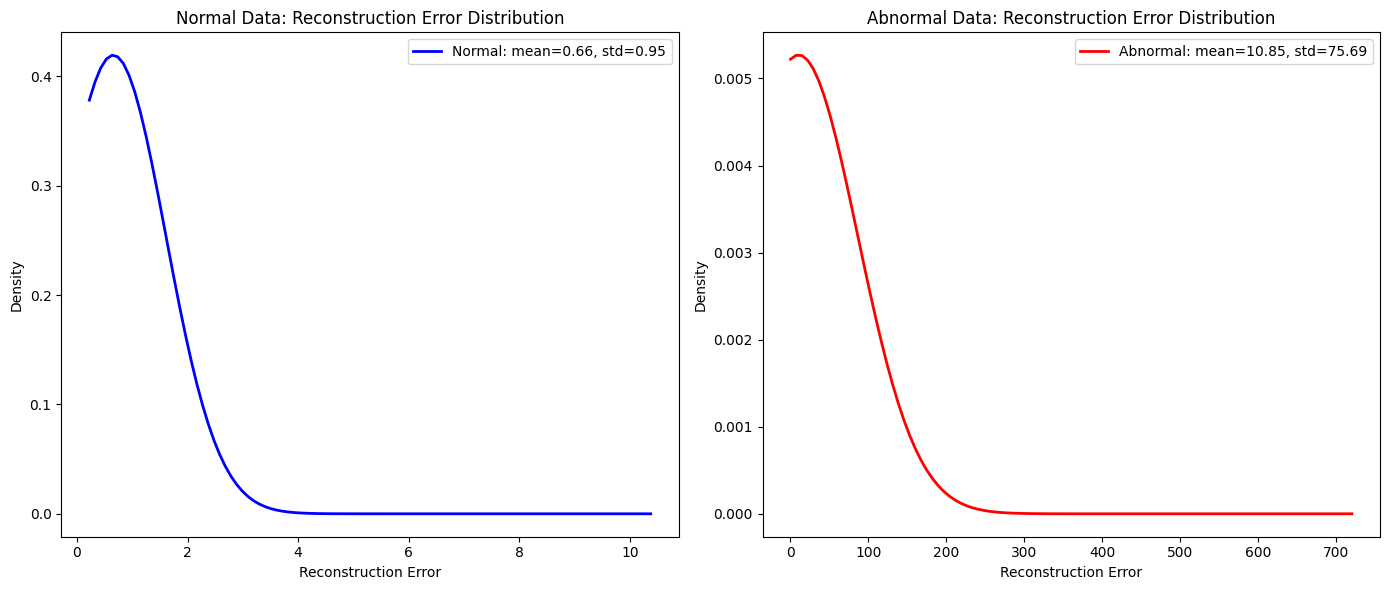

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 재구성 오류 데이터 추출
normal_errors = error_df_normal['reconstruction_error']
abnormal_errors = error_df_abnormal['reconstruction_error']

# 평균과 표준편차 계산 (정규분포)
mu_normal, std_normal = norm.fit(normal_errors)
mu_abnormal, std_abnormal = norm.fit(abnormal_errors)

# Subplot을 이용해 두 개의 그래프를 나란히 그리기
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 첫 번째 subplot: Normal 데이터의 정규분포
x_normal = np.linspace(min(normal_errors), max(normal_errors), 100)
p_normal = norm.pdf(x_normal, mu_normal, std_normal)
axes[0].plot(x_normal, p_normal, 'b', linewidth=2, label=f'Normal: mean={mu_normal:.2f}, std={std_normal:.2f}')
axes[0].set_title('Normal Data: Reconstruction Error Distribution')
axes[0].set_xlabel('Reconstruction Error')
axes[0].set_ylabel('Density')
axes[0].legend(loc='upper right')

# 두 번째 subplot: Abnormal 데이터의 정규분포
x_abnormal = np.linspace(min(abnormal_errors), max(abnormal_errors), 100)
p_abnormal = norm.pdf(x_abnormal, mu_abnormal, std_abnormal)
axes[1].plot(x_abnormal, p_abnormal, 'r', linewidth=2, label=f'Abnormal: mean={mu_abnormal:.2f}, std={std_abnormal:.2f}')
axes[1].set_title('Abnormal Data: Reconstruction Error Distribution')
axes[1].set_xlabel('Reconstruction Error')
axes[1].set_ylabel('Density')
axes[1].legend(loc='upper right')

# 그래프 간격 조정
plt.tight_layout()
plt.show()


In [49]:
threshold = 0.8

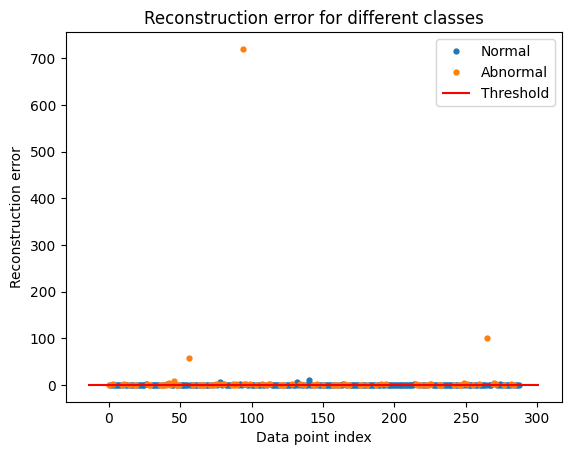

In [45]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Abnormal" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

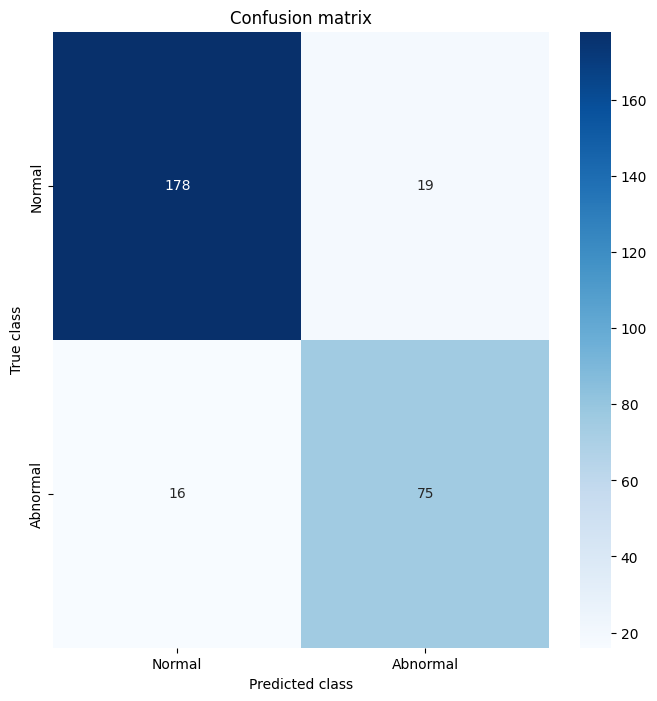

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       197
           1       0.80      0.82      0.81        91

    accuracy                           0.88       288
   macro avg       0.86      0.86      0.86       288
weighted avg       0.88      0.88      0.88       288



In [50]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",cmap="Blues");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))